# (Ford GoBike System Data pattern exploration)
## by (Abdullah Emad)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [110]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import matplotlib as mpl

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [111]:
df = pd.read_csv("-201902-fordgobike-tripdata.csv")

df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [112]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [113]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [114]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [115]:
df.duplicated().sum()

0

In [116]:
df.member_gender.value_counts()


Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [117]:
dff=df.copy(deep=True)

In [118]:
dff['member_gender'] = dff['member_gender'].astype('category')

dff['start_time'] = pd.to_datetime(dff['start_time'])
dff['end_time'] = pd.to_datetime(dff['end_time'])

dff['start_station_id'] = dff['start_station_id'].astype('str')
dff['end_station_id'] = dff['end_station_id'].astype('str')

dff['bike_id'] = dff['bike_id'].astype('str')

dff['user_type'] = dff['user_type'].astype('category')


In [119]:
# issue 2: add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

dff['duration_minute'] = dff['duration_sec']/60

dff['start_date'] = dff.start_time.dt.strftime('%Y-%m-%d')
dff['start_hourofday'] = dff.start_time.dt.strftime('%H')
dff['start_dayofweek'] = dff.start_time.dt.strftime('%A')
dff['start_month'] = dff.start_time.dt.strftime('%B')

dff.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February


In [120]:
dff['member_age'] = pd.DatetimeIndex(dff['start_date']).year - dff['member_birth_year']
dff.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,12.101307,34.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,29.906496,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,5.416667,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,8.566667,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,13.266667,39.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1424.066667,141.000000


## investigating member age distribution

Text(0.5, 1.0, 'count vs age distribution of members')

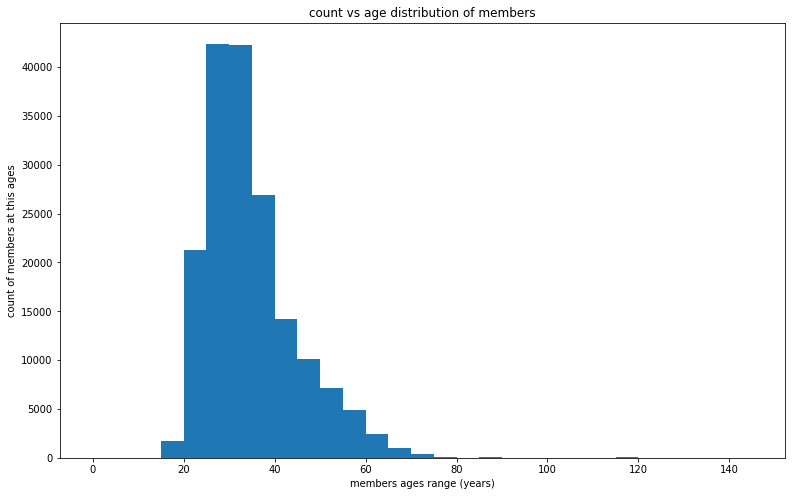

In [121]:

plt.figure(figsize=[13, 8])
bins = np.arange(0, dff['member_age'].max()+5, 5)
plt.hist(dff['member_age'].dropna(), bins=bins);
plt.xlabel('members ages range (years)')
plt.ylabel('count of members at this ages')
plt.title('count vs age distribution of members')


##most member ages ranges between 25-40 years old

In [122]:
# issue 4: filter out outlier ages from visually examination of the distribution above
# issue 5: cast 'member_birth_year' and 'member_age' to integer instead of float type

dff = dff.query('member_age <= 60')
dff['member_birth_year'] = dff['member_birth_year'].astype('int')
dff['member_age'] = dff['member_age'].astype('int')
dff.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171617 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171617 non-null  int64         
 1   start_time               171617 non-null  datetime64[ns]
 2   end_time                 171617 non-null  datetime64[ns]
 3   start_station_id         171617 non-null  object        
 4   start_station_name       171422 non-null  object        
 5   start_station_latitude   171617 non-null  float64       
 6   start_station_longitude  171617 non-null  float64       
 7   end_station_id           171617 non-null  object        
 8   end_station_name         171422 non-null  object        
 9   end_station_latitude     171617 non-null  float64       
 10  end_station_longitude    171617 non-null  float64       
 11  bike_id                  171617 non-null  object        
 12  user_type       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### What is the structure of your dataset?

> The original data contains approximately 183412 X 16 (individual trip records, columns). The features can be divided into 3 major categories:

* **trip duration**: duration_sec, start_time, end_time

* **station info**: start_station_id, start_station_name,        start_station_latitude,  start_station_longitude, end_station_id,  end_station_name, end_station_latitude, end_station_longitude

* **member info** : bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip,member_age

* supporting features in the analysis:
* **trip info**: duration_minute, start_date, start_hourofday, start_dayofweek, start_month
 

### What is/are the main feature(s) of interest in your dataset?

*  riders' characteristics associated with the trip informations eg:user type, gender, age, etc and bike trips' duration and rental events patterns

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

*  member information--> to identify target group
* trip's start date/time and duration information --> to understand how long and when a trip usually takes

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [123]:
dff.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_minute', 'start_date', 'start_hourofday', 'start_dayofweek',
       'start_month', 'member_age'],
      dtype='object')

In [124]:
selected_col=dff.columns.drop(['start_time','end_time','start_station_id','start_station_name','end_station_id','end_station_name','bike_id','start_date','start_hourofday','start_dayofweek'])
selected_col

Index(['duration_sec', 'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_minute', 'start_month', 'member_age'],
      dtype='object')

## exploring some univariate distriutions


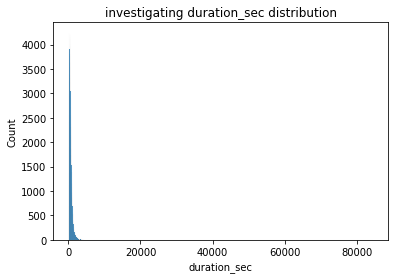

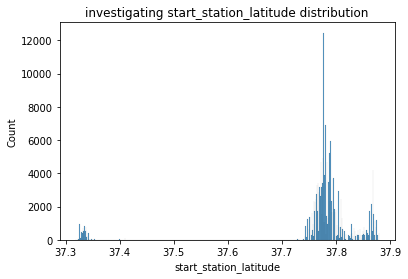

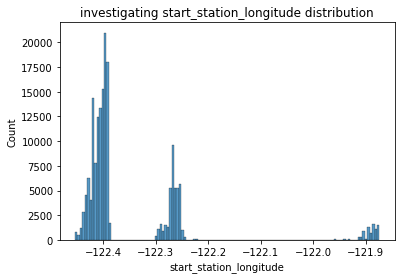

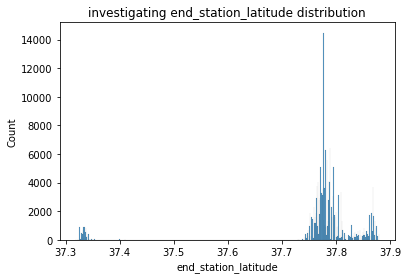

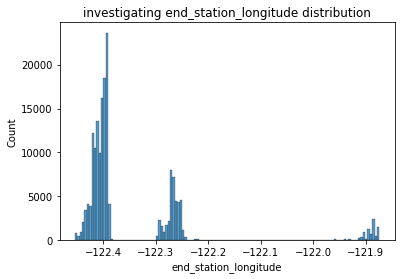

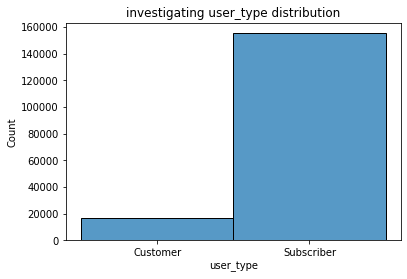

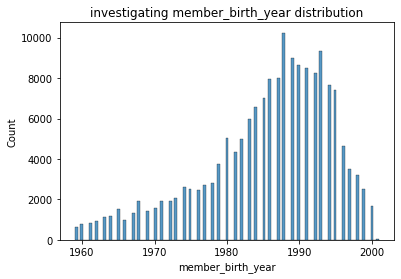

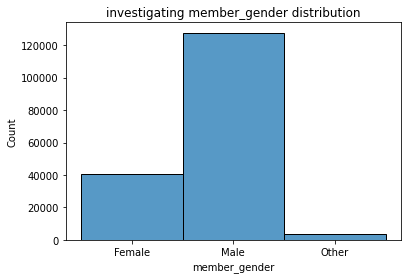

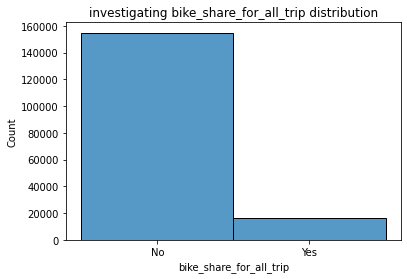

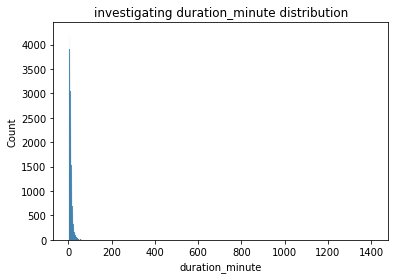

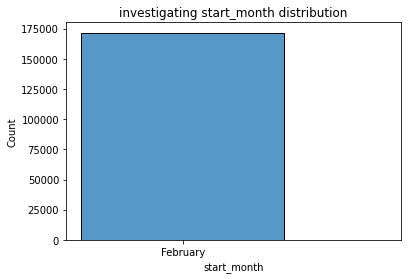

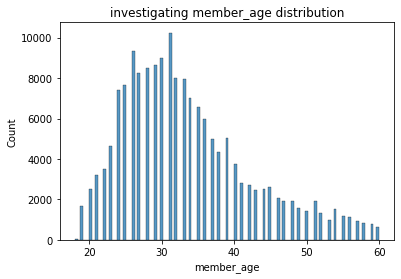

In [125]:
## ignoring unvaluable and repetitive columns
selected_col=dff.columns.drop(['start_time','end_time','start_station_id','start_station_name','end_station_id','end_station_name','bike_id','start_date','start_hourofday','start_dayofweek'])
for column in selected_col:
  plt.figure();  
  ax=sns.histplot(dff[column]);
  plt.title('investigating '+column+' distribution' )
# for column in df.select_dtypes(np.number).columns:
#   plt.figure();  
#   ax=sns.histplot(dff.query('failures==2'), x='G3', kde=True);



In [126]:
dff['start_hourofday']

0         17
2         12
3         17
4         23
5         23
          ..
183407    00
183408    00
183409    00
183410    00
183411    00
Name: start_hourofday, Length: 171617, dtype: object

<Figure size 432x288 with 0 Axes>

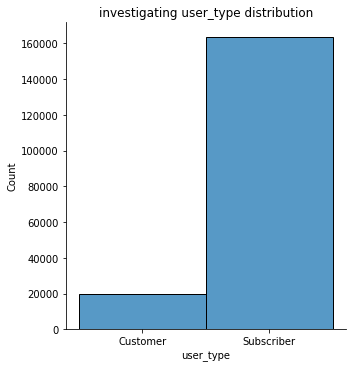

<Figure size 432x288 with 0 Axes>

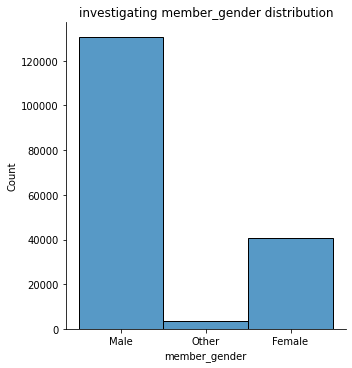

<Figure size 432x288 with 0 Axes>

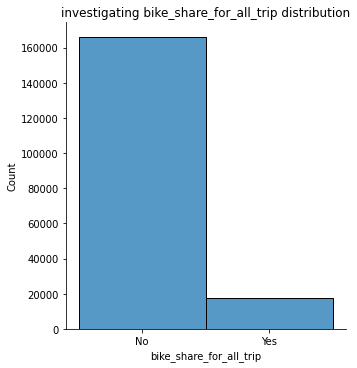

In [127]:
for column in ['user_type','member_gender','bike_share_for_all_trip']:
#for column in dff.select_dtypes(np.number).columns:
    plt.figure();             # <==================== here!
    ax = sns.displot(df[column]);
    plt.title('investigating '+column+' distribution' )

# comments:
## majority of user type is subscriber
## male are more than females
## most rider do not prefer (bike share for all trip)

# trying to investigate hot hours of bike trip usage

Text(0.5, 1.0, 'bike trip usage distribution / hour')

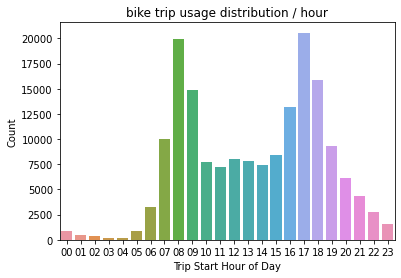

In [128]:
##qw=pd.DataFrame(columns=['start_hourofday'])
#dff['start_hourofday']
##xticks(np.arange(x['start_hourofday']))

#sb.countplot(data=dff, x='start_hourofday',order=dff['start_hourofday'].value_counts().index);
#sb.countplot(data=dff, x='start_hourofday',order=dff['start_hourofday'].sort_values(ascending=True));
sb.countplot(data=dff.sort_values('start_hourofday'), x='start_hourofday');

plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');
plt.title('bike trip usage distribution / hour')

##comment
# 8.00 Am and 5.00 PM are the most Start Hour of Day of trips-->corresponding to rush hours of work

Text(0.5, 1.0, 'count vs age distribution of members')

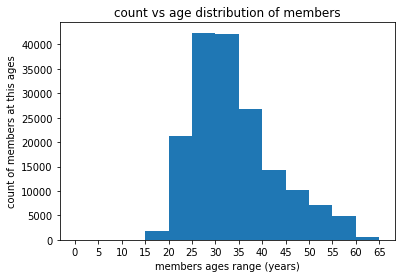

In [129]:
bins = np.arange(0, dff['member_age'].max()+10, 5)
plt.hist(data=dff, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('members ages range (years)')
plt.ylabel('count of members at this ages')
plt.title('count vs age distribution of members')

##comment
#most member aged between 25-35 years old ~ usaully normal age for working for standard start-of-life-person with low income at the beginning of his life

# investigating trip duration

Text(0.5, 1.0, 'trip duration distribution')

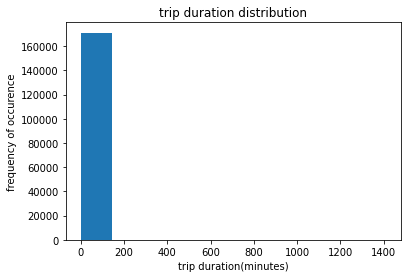

In [130]:
plt.hist(data=dff, x='duration_minute');
plt.xlabel('trip duration(minutes)')
plt.ylabel('frequency of occurence')
plt.title('trip duration distribution')


## comment
# most trips last for less than 15 minutes.

In [131]:
dff['duration_minute'].value_counts()

4.533333      304
5.083333      281
5.383333      279
6.150000      278
5.100000      272
             ... 
102.833333      1
59.366667       1
56.466667       1
41.950000       1
78.750000       1
Name: duration_minute, Length: 4389, dtype: int64

In [132]:
dff['duration_minute'].describe()

count    171617.000000
mean         11.724008
std          27.567113
min           1.016667
25%           5.383333
50%           8.500000
75%          13.116667
max        1409.133333
Name: duration_minute, dtype: float64

<Figure size 1080x648 with 0 Axes>

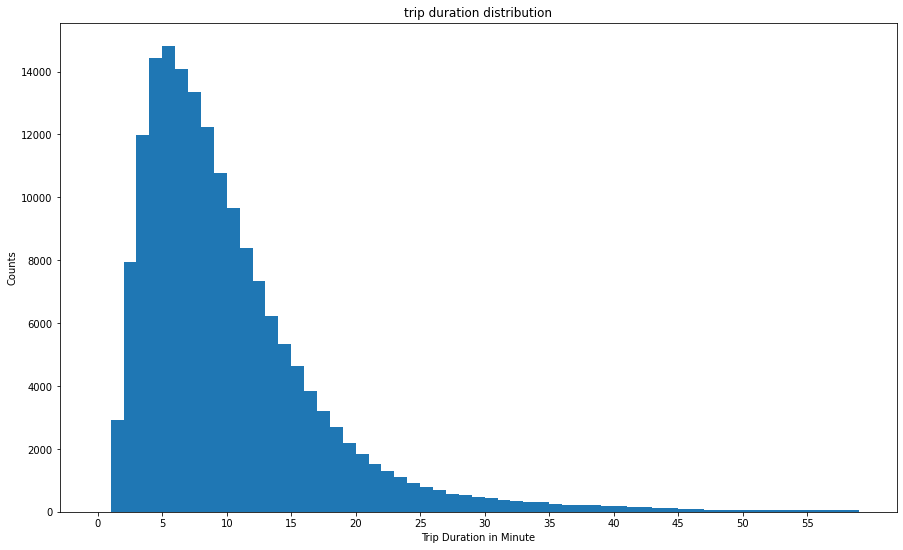

<Figure size 1080x648 with 0 Axes>

In [133]:
plt.figure(figsize=[15, 9])
bins = np.arange(0, 60, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data=dff, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Counts');
plt.title('trip duration distribution')
plt.figure(figsize=[15, 9])


## comment
# most trips last for less than 15 minutes.

In [134]:
dff['duration_minute'].max

<bound method Series.max of 0          869.750000
2         1030.900000
3          608.166667
4           26.416667
5           29.883333
             ...     
183407       8.000000
183408       5.216667
183409       2.350000
183410       2.316667
183411       4.516667
Name: duration_minute, Length: 171617, dtype: float64>

In [135]:
# issue 8: filter out outlier trip records where the duration was very long

dff = dff.query('duration_minute <= 59')
dff.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170206 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170206 non-null  int64         
 1   start_time               170206 non-null  datetime64[ns]
 2   end_time                 170206 non-null  datetime64[ns]
 3   start_station_id         170206 non-null  object        
 4   start_station_name       170015 non-null  object        
 5   start_station_latitude   170206 non-null  float64       
 6   start_station_longitude  170206 non-null  float64       
 7   end_station_id           170206 non-null  object        
 8   end_station_name         170015 non-null  object        
 9   end_station_latitude     170206 non-null  float64       
 10  end_station_longitude    170206 non-null  float64       
 11  bike_id                  170206 non-null  object        
 12  user_type       

In [136]:
dff.to_csv('201902-fordgobike-tripdata-cleaned.csv', index=False)

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* summer was  the most popular season , may be due to the weather
*  there were more trips on work days (Monday-Friday) compared to weekends
* most member aged between 25-35 years old
* majority of user type is subscriber
* male are more than females
* most rider do not prefer bike_share_for_all_trip
* Most rides were short timed, lasted between 5 to 10 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* The distribution of the trip duration was unusual,but by removing the outliers and investigating smaller ranges , the distribution become more clear.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).


# investigating the relation between gender and trip duration

Text(0.5, 1.0, 'trip duration vs gender')

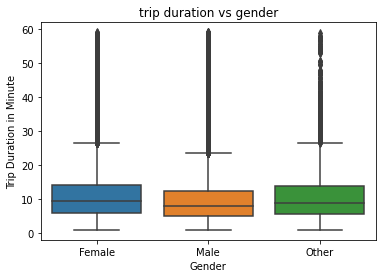

In [137]:
sb.boxplot(data=dff, x='member_gender', y='duration_minute');
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.title('trip duration vs gender')

##comment
# Although there were almost the same, male riders tend to have shorter trips compared to female users

In [138]:
dff['start_dayofweek'].value_counts()

Thursday     32881
Tuesday      29900
Wednesday    27743
Friday       26937
Monday       24938
Saturday     13907
Sunday       13900
Name: start_dayofweek, dtype: int64

# investigating the relation between days of week and trip duration

Text(0.5, 1.0, 'trip duration vs day of week')

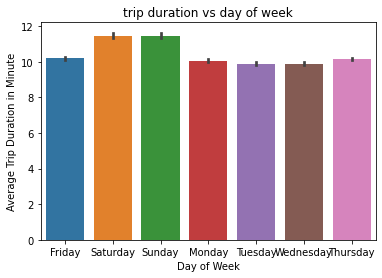

In [139]:
day_order = ['Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday']
sb.barplot(data=dff, x='start_dayofweek', y='duration_minute',order=day_order);
plt.xlabel('Day of Week');
plt.ylabel('Average Trip Duration in Minute');
plt.title('trip duration vs day of week')

## comment
# Average Trip Duration in Minute is more in saturday and sunday

#investigating the relation between months of year and trip duration

Text(0.5, 1.0, 'trip duration vs months of year')

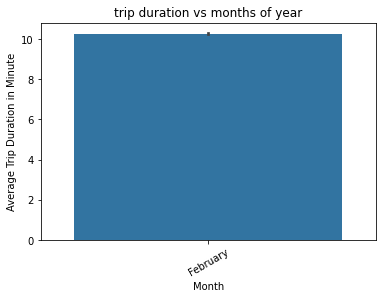

In [140]:
#plt.figure(figsize=[15, 9])
sb.barplot(data=dff, x='start_month', y='duration_minute');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Average Trip Duration in Minute');
plt.title('trip duration vs months of year')

# original dataset months distribution is strange 

#investigating the relation between Day of Week and member age

Text(0.5, 1.0, 'Day of Week vs Member Age')

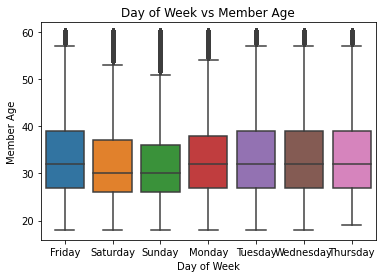

In [141]:
sb.boxplot(data=dff, x='start_dayofweek', y='member_age',order=day_order);
plt.xlabel('Day of Week');
plt.ylabel('Member Age')
plt.title('Day of Week vs Member Age')

##comment
# older ages rent more from monday to friday-->probably for work purposes

#investigating the relation between user type and member age

Text(0.5, 1.0, 'User Type vs Member Age')

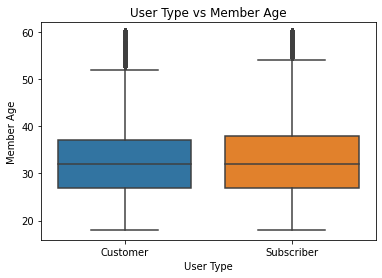

In [142]:
sb.boxplot(data=dff, x='user_type', y='member_age');
plt.xlabel('User Type');
plt.ylabel('Member Age');
plt.title('User Type vs Member Age')

##comment
# almost no difference

#investigating the relation between user type and Trip Duration

Text(0.5, 1.0, 'User Type vs Trip Duration')

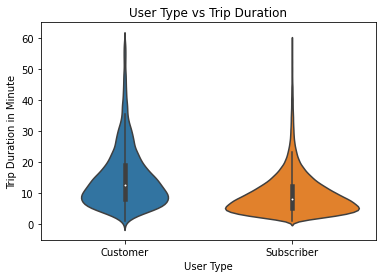

In [143]:
sb.violinplot(data=dff, x='user_type', y='duration_minute');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('User Type vs Trip Duration')

##comment
# The trip duration distribution is much narrower for subscribers compared to customer-->indicating usage to raech work

#investigating the distribution of trip hour of usage for each user type

Text(0.5, 1.0, 'distribution of trip hour of usage for each user type')

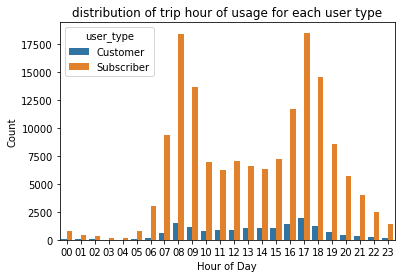

In [144]:
sb.countplot(data=dff.sort_values('start_hourofday'), x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.title('distribution of trip hour of usage for each user type')

##comment
#subscribers show a pattern of high amount of Day trips at 8.00 Am and 5.00 PM , while customers distribution was not similiar -->indicating that subscribers used it likely for work 

#investigating the distribution of trip day of usage for each user type

Text(0.5, 1.0, 'distribution of trip day of usage for each user type')

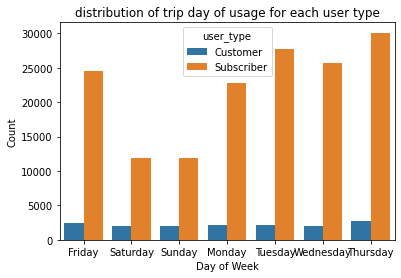

In [145]:
sb.countplot(data=dff, x='start_dayofweek', hue='user_type',order=day_order);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('distribution of trip day of usage for each user type')

##comment
# more subscriber usage than casual customers overall , but subscriber usage drops on weekends as they probably used it to reach work

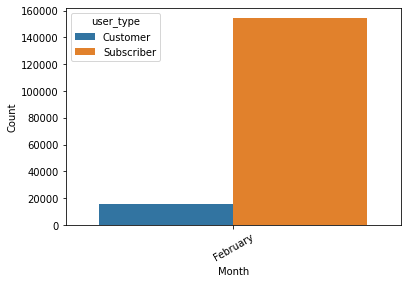

In [146]:
sb.countplot(data=dff, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

strange distribution

In [147]:
dff['start_month'].value_counts()

February    170206
Name: start_month, dtype: int64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* subscribers show a pattern of high amount of Day trips at 8.00 Am and 5.00 PM ,while customers distribution was not similiar

* more subscriber usage than casual customers overall , but subscriber usage drops on weekends

*  Subscriber users are slightly older than customer users

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* age of bike rider is interesting, older aged users use bike trips more than younger users

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#investigating the relation of trip day of usage and trip duration  for each user type

Text(0.5, 1.0, 'trip day of usage vs  trip duration ')

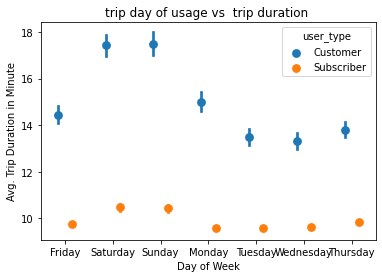

In [148]:
sb.pointplot(data=dff, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="",order=day_order);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('trip day of usage vs  trip duration ')

##comment
# subscribers ride much shorter trips compared to customers on each day of the week

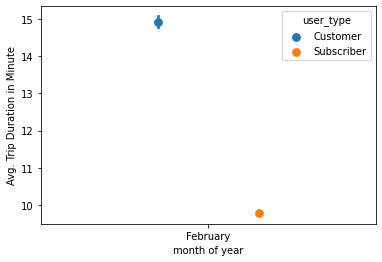

In [149]:
sb.pointplot(data=dff, x='start_month', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('month of year');
plt.ylabel('Avg. Trip Duration in Minute');

#investigating the relation of trip hour of usage and trip duration for each user type

Text(0.5, 1.0, 'trip hour of usage vs  trip duration')

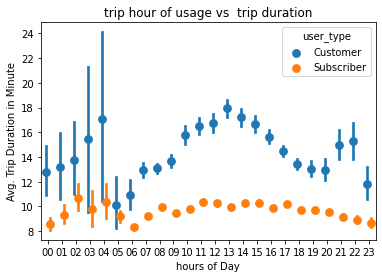

In [150]:
sb.pointplot(data=dff.sort_values('start_hourofday'), x='start_hourofday', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('hours of Day');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('trip hour of usage vs  trip duration')

##comment
# subscribers ride much shorter trips compared to customers on each hour of the day,indicating that customers usually  used it for entertainment

##another plot to investigate the relation of trip hour of usage and trip duration for each user type
## to check reasons for high volatility

Text(0.5, 1.0, 'trip hour of usage vs  trip duration')

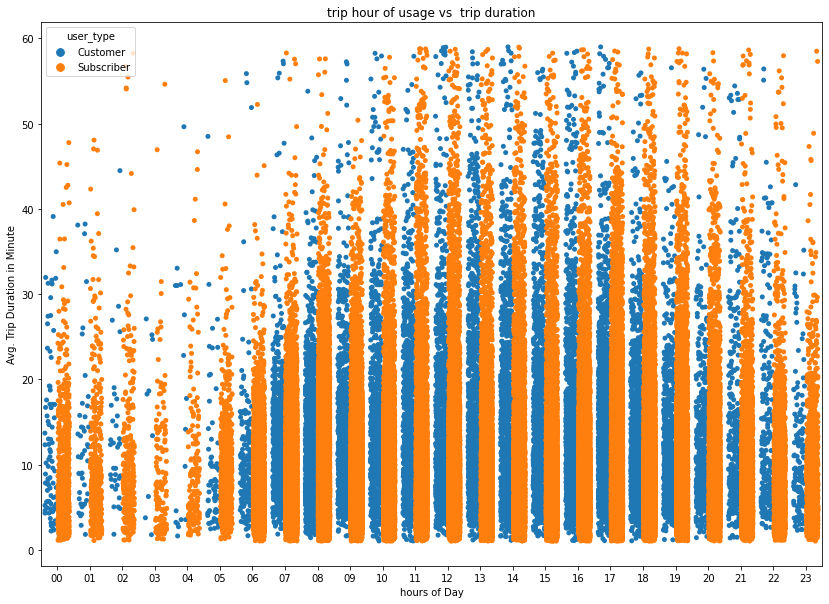

In [151]:
plt.figure(figsize=[14,10])
sb.stripplot(data=dff.sort_values('start_hourofday'), x='start_hourofday', y='duration_minute', hue='user_type', dodge=0.3, jitter=0.35);
plt.xlabel('hours of Day');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('trip hour of usage vs  trip duration')

##comment
#small amount od data at the range (00-5) houra is the reason for high volatility

#investigating the relation of member age and trip duration for each user type

Text(0.5, 1.0, 'member age vs  trip duration')

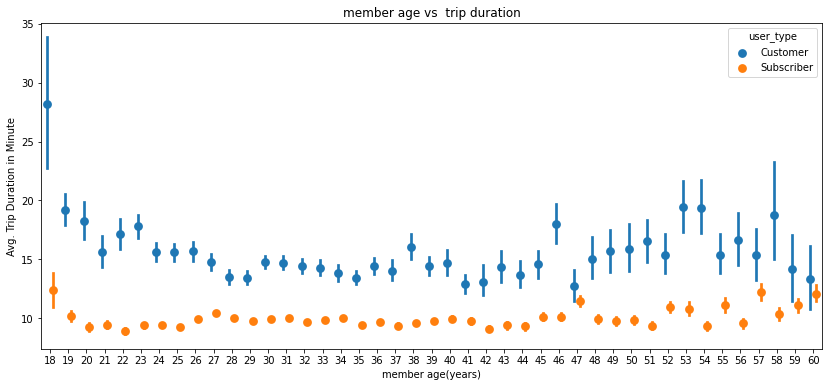

In [152]:
plt.figure(figsize=[14,6])
sb.pointplot(data=dff.sort_values('member_age'), x='member_age', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('member age(years)');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('member age vs  trip duration')

##comment
# *subscribers ride much shorter trips compared to customers for all ages,indicating that customers usually  used it for entertainment.

#*customers show pattern of large trip duration around 20 and 53 years old indicating high entertainment periods. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* subscribers ride much shorter trips compared to customers on each hour of the day that point toward using trips during going and returning from work that is relatively close to home( deduced from short period of trip time ) 

* customers used bike trips over weekends usually for tours 

* subscribers ride much shorter trips compared to customers for all ages,indicating that customers usually used it for entertainment.

* customers show pattern of large trip duration around 20 and 53 years old indicating high entertainment periods.

### Were there any interesting or surprising interactions between features?

* age of bike rider is interesting, older aged users use bike trips mostly for work more than younger users.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!